### Imports

In [1]:
from mlp import train, Dense, predict_with_layer_value
from activation_functions import Sigmoid
from mse import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix, plot_bitmap_matrix_with_noise, get_config_params, add_noise_to_dataset
from data.font import fontDict
import numpy as np
import matplotlib.pyplot as plt

### Config params

In [2]:
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation, hidden_layers, latent_space = get_config_params('./denoising_ae.json')

In [6]:
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
dataset = np.reshape(bitmapList,(len(bitmapList), 35, 1))
noisy_dataset = add_noise_to_dataset(dataset, 0.1)

### 35x20x10x2x10x20x35

In [4]:
# El espacio latente es la salida de la "capa 6"
autoencoder = [
    Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
]
error = train(autoencoder, mse, mse_derivative, dataset, dataset, epochs=max_epochs, verbose=False)

### Original vs Noisy vs Predicted

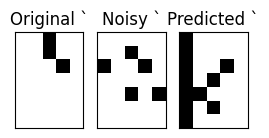

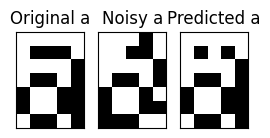

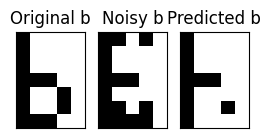

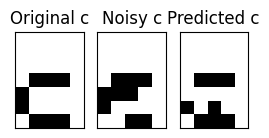

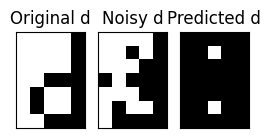

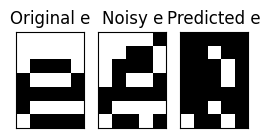

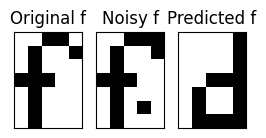

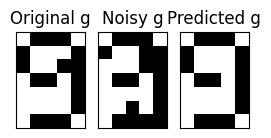

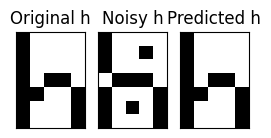

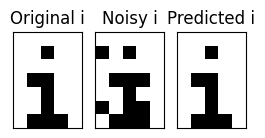

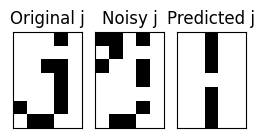

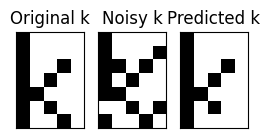

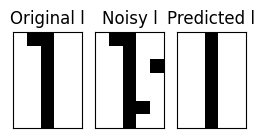

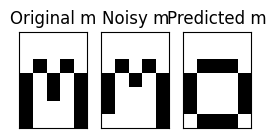

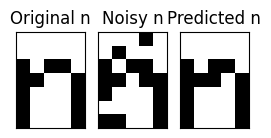

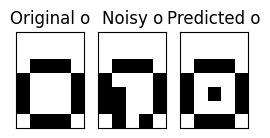

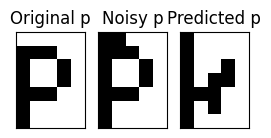

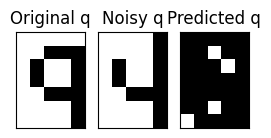

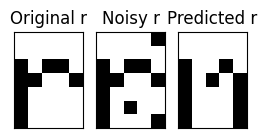

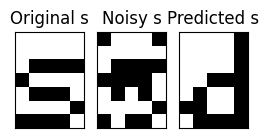

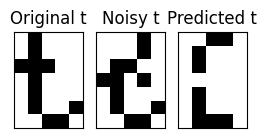

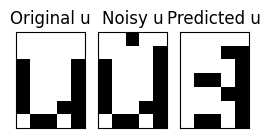

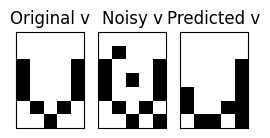

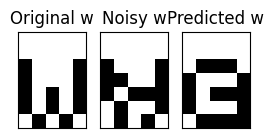

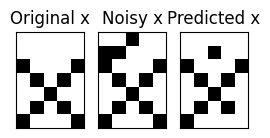

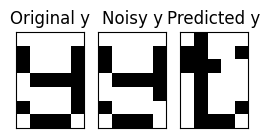

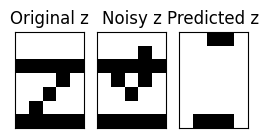

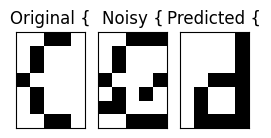

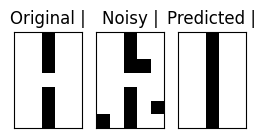

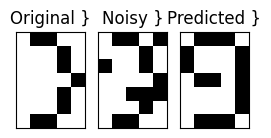

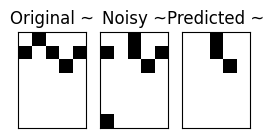

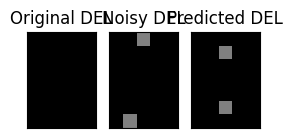

In [8]:
characters = list(bitmapDict.keys())

for c in range(len(characters)):
    input_bitmap = []
    noisy_bitmap = []
    output_bitmap = []

    # dataset es una lista de listas de -listas con un solo elemento-
    for i in range(len(dataset[c])):
        input_bitmap.append(dataset[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)

    for i in range(len(noisy_dataset[c])):
        noisy_bitmap.append(noisy_dataset[c][i][0])
    noisy_bitmap_matrix = bitmap_as_matrix(noisy_bitmap)    


    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, noisy_dataset[c], 6)


    for output in outputs:
        # Para tanh, deberia ser "1 if num[0] > 0 else 0"?
        output_bitmap.append(round(abs(output[0])))
    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)

    # Marcamos en gris los pixeles que cambiaron
    # for i in range(len(output_bitmap_matrix)):
    #     for j in range(len(output_bitmap_matrix[i])):
    #         if output_bitmap_matrix[i][j] != noisy_bitmap_matrix[i][j]:
    #             output_bitmap_matrix[i][j] = 0.3
    
    plot_bitmap_matrix_with_noise(input_bitmap_matrix, noisy_bitmap_matrix, output_bitmap_matrix, characters[c])